### 42186 - Model Based Machine Learning

Hello, welcome to our course on Model-Based Machine Learning. We hope you will enjoy and learn a lot of new powerful techniques for your future.



# Week1. Probability and statistics review

For a start, we need to review some concepts of probability and statistics. 

As usual in Python, the first thing to do is to import the necessary packages. Let's start with some usual ones for now...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
%matplotlib inline

## Part 1 - Random variables, independence, conditionality, Bayes theorem

We are going to work on a 2D world for now, and a uniform distribution.

So, let's create N 2D points:

In [2]:
N=500
pts=np.random.uniform(size=(N,2)) 

Take a look at these points. You'll notice they all follow inside a [0,1]x[0,1] square...

Can you count how many such points fall inside a circle centered at (0,0) and radius 1?

In [12]:
def in_circ(x, y):
    return x**2+y**2-1<0

In [13]:
inc=sum([in_circ(x, y) for x, y in pts])

In [14]:
inc

384

Consider A={A given point (x,y) falls inside the circle centered at (0,0) with radius 1}

Calculate the probability of A, P(A)

In [15]:
total=len(pts)

In [16]:
p_a=inc/total

Visualizations are often quite useful. Can you visualize both the points as well as the circle line?

In [17]:
circle_line=[]
for x in np.arange(0, 1, .001):
        y=math.sqrt(1-x**2)
        circle_line.append([x, y])
        
circle_line=np.array(circle_line)

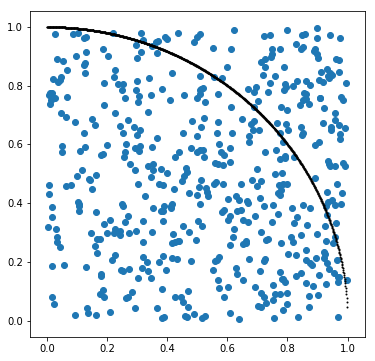

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(pts[:,0], pts[:, 1])
plt.scatter(circle_line[:,0], circle_line[:,1], c="black", s=1)


Just to link with your trigonometrics knowledge: what is the area of this circle (radius=1)? And what is the area of a quarter of that circle (the part that you just drew)?

What is the relationship with that value and the probability that you just calculated (you can vary the number of points, N, to check your theory)?

In [19]:
math.pi/4

0.7853981633974483

Now, let's add a new event B={A point (x,y) falls on the right hand side of the [0,1]x[0,1] square}

Calculate p(B) 

In [20]:
def in_right(x, y):
    return x>=.5

inr=sum([in_right(x, y) for x, y in pts])

p_b=inr/total

In [21]:
p_b

0.55600000000000005

So, now you have p(A) and p(B). Do you want to try calculating p(A,B)?

Are they independent? Is there any reason to believe that they aren't?

To check this, try two approaches:

-- p(A,B)=P(A)*P(B)

-- Just count the points that fulfill both A and B constraints (and divide by the total number of points... ;-) ).


In [22]:
p_a*p_b

0.42700800000000005

In [23]:
inr_and_c=sum([in_right(x, y) and in_circ(x,y) for x, y in pts])
inr_and_c/total

0.34399999999999997

They are different! Why?... If you are in doubt, take a look at the picture...

Maybe they are not independent, after all... if so, their joint probability is instead

p(a,b)=p(a|b)*p(b)


Please calculate p(a|b), in order to get the right value...

In [24]:
inc_given_inr=sum([in_circ(x, y) for x, y in pts if in_right(x, y)])
inr_total=sum([1 for x, y in pts if in_right(x, y)])
p_a_given_b=inc_given_inr/inr_total

In [25]:
p_a_given_b

0.61870503597122306

Now you calculate p(a,b)=p(a|b)*p(b)

In [26]:
p_a_given_b*p_b

0.34400000000000003

Compare with the values above. Does it make more sense now? 

Another well known property is the Bayes theorem:

$p(b|a)=\frac{p(a|b)p(b)}{p(a)}$

Calculate the p(b|a) using the Bayes theorem, and calculate it directly from data. Are they converging to the same value?


In [27]:
p_b_given_a=p_a_given_b*p_b/p_a
p_b_given_a

0.44791666666666669

In [28]:
inr_given_inc=sum([in_right(x, y) for x, y in pts if in_circ(x, y)])
inc_total=sum([1 for x, y in pts if in_circ(x, y)])
inr_given_inc/inc_total

0.44791666666666669

Look at the following table:

In [29]:
f=pd.DataFrame([[0.068966, 0.137931, 0.068966], [0.344828, 0.241379, 0.137931]], columns=['T=Hot', 'T=Mild', 'T=Cold'], index=['W=Sunny', "W=Cloudy"])
print(f)

             T=Hot    T=Mild    T=Cold
W=Sunny   0.068966  0.137931  0.068966
W=Cloudy  0.344828  0.241379  0.137931


Marginalization allows us to compute distributions over a selection of variables that we want. For example, for the table above, that represents P(W, T) in a non-normalized way, we could "marginalize out weather", i.e. calculate P(T), by doing 

$P(T)=\sum_W P(W, T)$

Marginalize out weather

In [66]:
f.sum(axis=0) #axis=0 means we're summing over the lines

T=Hot     0.413794
T=Mild    0.379310
T=Cold    0.206897
dtype: float64

Marginalize out temperature

In [67]:
f.sum(axis=1)

W=Sunny     0.275863
W=Cloudy    0.724138
dtype: float64

--------

## Part 2 - Independence

Let's get further into the concept of **independence**

To begin with, let's create a small dataset of size N. We will start with two random variables, Z and T, both uniformly distributed. 

Each random variable will be an integer value in {0, 1, 2} (you can change this later, of course). 

In [32]:
N=1000
D=3

Z=np.random.randint(D, size=N)
T=np.random.randint(D, size=N)

Let's calculate the probability of each different value of Z. Take a look at this code. It may be useful later

In [33]:
z_items, z_counts=np.unique(Z, return_counts=True, axis=0) #returns a list of different items in Z; it also counts how 
                                                         #many times each one appears

#calculates the p(Z=z), for each possible value of z
for item, ct in zip(z_items, z_counts):     
    print("p(Z=%d)=%f"%(item, ct/N))

p(Z=0)=0.350000
p(Z=1)=0.320000
p(Z=2)=0.330000


Actually, we're going to reuse the above code quite a lot. Let's make a new function, then... 

In [34]:
#Function p. It receives a list of values, K, and simply prints the probability of each of its values
#nam and given - Two strings just for printing. Just run this once and you'll see... ;-)
def p(nam, K, given=""):    
    k_items, k_counts=np.unique(K, return_counts=True, axis=0)
    for item, ct in zip(k_items, k_counts):
        print("p(%s=%s%s)=%f"%(nam, item, given, ct/sum(k_counts)))

Let's try it with our variables Z and T

In [35]:
p('Z', Z)
p('T', T)

p(Z=0)=0.350000
p(Z=1)=0.320000
p(Z=2)=0.330000
p(T=0)=0.359000
p(T=1)=0.304000
p(T=2)=0.337000


ok. So, we have the probability of each value, according to this dataset. 

Assuming that both Z and T are uniformly distributed, the calculation for the probability of each should be trivial, right? What is it?

In [36]:
p_z=1/D
p_t=1/D
p_z, p_t

(0.3333333333333333, 0.3333333333333333)

Does it match the above? If you're in doubt, you can increase the value of N, the dataset size. As N grows, it should approximate your calculation... 

Let's now think of the joint distribution of Z and T. In other words, how these two variables seem to co-vary, together. The first thing to do is to "align" them, i.e., re-create a new random variable (Z_T), that is a pair of observations, Z and T. 

In [37]:
Z_T=np.stack((Z,T), axis=-1)  #Check the result of this operation, to understand what it does...

So, let's use the function above, to calculate the join distribution

In [38]:
p("Z,T", Z_T)

p(Z,T=[0 0])=0.122000
p(Z,T=[0 1])=0.108000
p(Z,T=[0 2])=0.120000
p(Z,T=[1 0])=0.118000
p(Z,T=[1 1])=0.094000
p(Z,T=[1 2])=0.108000
p(Z,T=[2 0])=0.119000
p(Z,T=[2 1])=0.102000
p(Z,T=[2 2])=0.109000


Are Z and T independent? If yes, the formula for their join distribution is trivial. Please calculate it (and check if it verifies).

In [39]:
p_z_t=p_z*p_t

In [40]:
p_z_t

0.1111111111111111

Let's create two more variables, both based on Z. 

In [41]:
betaY=-2    
betaX=1
Y=betaY*Z
X=betaX*Z

Are they independent? What do you think? A good way to see is by plotting... do you want to do it?

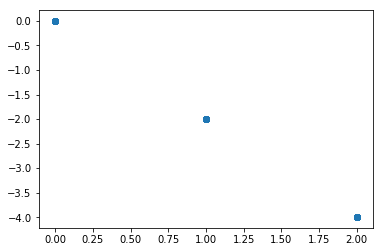

In [42]:
plt.scatter(X, Y)

What should it look like when variables are independent? And when they are correlated?

Let's check their joint distribution, then... 

In [43]:
X_Y=np.stack((X,Y), axis=-1)
p("X,Y", X_Y)


p(X,Y=[0 0])=0.350000
p(X,Y=[ 1 -2])=0.320000
p(X,Y=[ 2 -4])=0.330000


Notice that, for all other value combinations (e.g. X,Y=[0,-2]), the probability is zero.

If X and Y are independent, then the product of their marginal probabilities should be equal to the values above, right? Do you want to calculate?

In [44]:
p("X", X)
p("Y", Y)

p(X=0)=0.350000
p(X=1)=0.320000
p(X=2)=0.330000
p(Y=0)=0.350000
p(Y=-4)=0.330000
p(Y=-2)=0.320000


In [45]:
.331*.331

0.109561

Should the values match at all? Let's try instead to calculate the conditional probabilities, of and X and Y, given Z.

To do it, directly on the data, we need to calculate, for EACH value of Z, the distributions for both X and Y.

This means that we need to organize the data accordingly. How about using a dictionary? 

In [46]:
from collections import defaultdict

z_dict=defaultdict(list)

for x, y, z in zip(X, Y, Z):
    z_dict[z].append([x,y])
    

To make sure you understand the code above, don't forget to check z_dict carefully...

The code below uses the dictionary to calculate the conditional marginal and joint distributions. Check it carefully.

In [47]:
for z in z_dict:
    X_Y=z_dict[z]
    X=np.array(X_Y)[:,0]
    Y=np.array(X_Y)[:,1]  
    p("X", X, "|Z=%d"%z)
    p("Y", Y,"|Z=%d"%z)
    p("X_Y", X_Y, "|Z=%d"%z)

p(X=1|Z=1)=1.000000
p(Y=-2|Z=1)=1.000000
p(X_Y=[ 1 -2]|Z=1)=1.000000
p(X=0|Z=0)=1.000000
p(Y=0|Z=0)=1.000000
p(X_Y=[0 0]|Z=0)=1.000000
p(X=2|Z=2)=1.000000
p(Y=-4|Z=2)=1.000000
p(X_Y=[ 2 -4]|Z=2)=1.000000


So, what do you conclude? Is it true that X is independent of Y given Z?

The example above was particularly odd, because there is NO randomness involved (i.e. X is **exactly** betaX times Z). As a consequence, the probabilities are quite extreme. 

Try to redo the whole exercise, by adding a little randomness to X and Y (don't forget to keep them as integers). Notice how the conditional independence property varies of "intensity", as you add more or less randomness... 

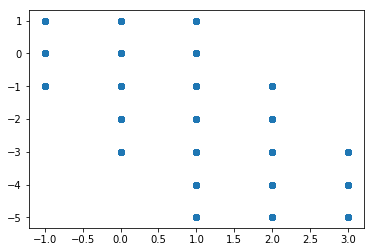

In [48]:
betaY=-2
betaX=1
Y=betaY*Z+np.random.randint(3,size=len(Z))-1
X=betaX*Z+np.random.randint(3,size=len(Z))-1
plt.scatter(X, Y)

In [49]:
X_Y=np.stack((X,Y), axis=-1)
p("X,Y", X_Y)

p(X,Y=[0 0])=0.035000
p(X,Y=[0 1])=0.036000
p(X,Y=[ 0 -3])=0.038000
p(X,Y=[ 0 -2])=0.035000
p(X,Y=[ 0 -1])=0.062000
p(X,Y=[1 0])=0.051000
p(X,Y=[1 1])=0.041000
p(X,Y=[ 1 -5])=0.040000
p(X,Y=[ 1 -4])=0.037000
p(X,Y=[ 1 -3])=0.068000
p(X,Y=[ 1 -2])=0.037000
p(X,Y=[ 1 -1])=0.070000
p(X,Y=[ 2 -5])=0.039000
p(X,Y=[ 2 -4])=0.041000
p(X,Y=[ 2 -3])=0.073000
p(X,Y=[ 2 -2])=0.031000
p(X,Y=[ 2 -1])=0.044000
p(X,Y=[ 3 -5])=0.041000
p(X,Y=[ 3 -4])=0.031000
p(X,Y=[ 3 -3])=0.030000
p(X,Y=[-1  0])=0.027000
p(X,Y=[-1  1])=0.042000
p(X,Y=[-1 -1])=0.051000


In [50]:
p("X", X)
p("Y", Y)

p(X=0)=0.206000
p(X=1)=0.344000
p(X=2)=0.228000
p(X=3)=0.102000
p(X=-1)=0.120000
p(Y=0)=0.113000
p(Y=1)=0.119000
p(Y=-5)=0.120000
p(Y=-4)=0.109000
p(Y=-3)=0.209000
p(Y=-2)=0.103000
p(Y=-1)=0.227000


In [51]:
.22*.11

0.0242

In [52]:
from collections import defaultdict

z_dict=defaultdict(list)

for x, y, z in zip(X, Y, Z):
    z_dict[z].append([x,y])
    
for z in z_dict:
    X_Y=z_dict[z]
    x=np.array(X_Y)[:,0]
    y=np.array(X_Y)[:,1]  
    p("X", x, "|Z=%d"%z)
    p("Y", y,"|Z=%d"%z)
    p("X_Y", X_Y, "|Z=%d"%z)
    

p(X=0|Z=1)=0.315625
p(X=1|Z=1)=0.331250
p(X=2|Z=1)=0.353125
p(Y=-3|Z=1)=0.337500
p(Y=-2|Z=1)=0.321875
p(Y=-1|Z=1)=0.340625
p(X_Y=[ 0 -3]|Z=1)=0.118750
p(X_Y=[ 0 -2]|Z=1)=0.109375
p(X_Y=[ 0 -1]|Z=1)=0.087500
p(X_Y=[ 1 -3]|Z=1)=0.100000
p(X_Y=[ 1 -2]|Z=1)=0.115625
p(X_Y=[ 1 -1]|Z=1)=0.115625
p(X_Y=[ 2 -3]|Z=1)=0.118750
p(X_Y=[ 2 -2]|Z=1)=0.096875
p(X_Y=[ 2 -1]|Z=1)=0.137500
p(X=0|Z=0)=0.300000
p(X=1|Z=0)=0.357143
p(X=-1|Z=0)=0.342857
p(Y=0|Z=0)=0.322857
p(Y=1|Z=0)=0.340000
p(Y=-1|Z=0)=0.337143
p(X_Y=[0 0]|Z=0)=0.100000
p(X_Y=[0 1]|Z=0)=0.102857
p(X_Y=[ 0 -1]|Z=0)=0.097143
p(X_Y=[1 0]|Z=0)=0.145714
p(X_Y=[1 1]|Z=0)=0.117143
p(X_Y=[ 1 -1]|Z=0)=0.094286
p(X_Y=[-1  0]|Z=0)=0.077143
p(X_Y=[-1  1]|Z=0)=0.120000
p(X_Y=[-1 -1]|Z=0)=0.145714
p(X=1|Z=2)=0.342424
p(X=2|Z=2)=0.348485
p(X=3|Z=2)=0.309091
p(Y=-5|Z=2)=0.363636
p(Y=-4|Z=2)=0.330303
p(Y=-3|Z=2)=0.306061
p(X_Y=[ 1 -5]|Z=2)=0.121212
p(X_Y=[ 1 -4]|Z=2)=0.112121
p(X_Y=[ 1 -3]|Z=2)=0.109091
p(X_Y=[ 2 -5]|Z=2)=0.118182
p(X_Y=[ 2 -4]|Z=2)=0.124

In [53]:
.36*.36

0.1296

In [54]:
.33*.33

0.10890000000000001

Finally, let's try a different perspective on conditional independence: why does it actually matter??

Particularly, we want to understand the meaning of the following sentence:

**"If we know Z, then knowing about Y tells us nothing about X"**



Using your small dataset (X, Y, Z), you will try to make linear regression prediction models. Our goal is to "know about X", i.e. X will be the target (or dependent) variable in our linear regression. 

Compare the following models:

- $X=\beta_1*Z$
- $X=\beta_1*Y+\beta_2*Z$
- $X=\beta_1*Y$

In [55]:
from sklearn.linear_model import LinearRegression

lr1=LinearRegression(fit_intercept=False)
lr2=LinearRegression(fit_intercept=False)
lr3=LinearRegression(fit_intercept=False)
lr4=LinearRegression(fit_intercept=False)

In [56]:
X=np.array(X, ndmin=2)
Y=np.array(Y, ndmin=2)
Z=np.array(Z, ndmin=2)


In [57]:
Y_Z=np.stack((Y,Z), axis=-1)[0]

In [58]:
lr1.fit(Z.T, X.T)
lr3.fit(Y_Z, X.T)
lr4.fit(Y.T, X.T)

//anaconda/envs/snakes/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [59]:
print(lr1.coef_)
print(lr3.coef_)
print(lr4.coef_)

[[ 0.99390244]]
[[ 0.03823156  1.0712281 ]]
[[-0.44304483]]


Notice the coefficients, what do they mean?

--------

## Part 3 - Expectation of discrete variables

Calculate the expected value of X, using

$E(X)=\sum_x xP(x)$

In [60]:
vals, counts=np.unique(X, return_counts=True)
tot=sum(counts)

In [61]:
EX=0
for v, c in zip(vals, counts):
    EX+=v*c/tot

In [62]:
EX

0.98599999999999999

Compare it with the mean of X (X.mean() )

In [63]:
X.mean()

0.98599999999999999

-------